## BFSI Credit Score Case Study

ECL method is used for provisioning the capital buffer to protect banks against possible default of the customers. The ECL provisioning is a mandatory accounting principle set by the Basel III norms.

The Basel norms, also known as the Basel Accords or Basel Regulations, are a set of international regulatory standards for the banking industry. These norms were developed by the Basel Committee on Banking Supervision, which is an international committee of banking supervisors from around the world. The committee was formed in 1974 by the central bank governors of the Group of Ten (G-10) countries. The history of the Basel norms can be traced back to the late 1970s and early 1980s when the banking industry was facing a series of crises and failures. These crises were caused by a combination of factors, including insufficient capital and liquidity, inadequate risk management and weak supervisory oversight. In response to these crises, the Basel Committee began to develop a set of international standards for bank capital and risk management to strengthen the resilience of the global banking system and reduce the risk of bank failures.

The first Basel Accord, known as Basel I, was issued in 1988, which introduced the first set of minimum capital requirements for banks. Basel I was revised in 2004 with the introduction of Basel II, which aimed to improve the risk sensitivity of the capital requirements and provide a more sophisticated approach to calculating capital ratios. Subsequently, Basel III was introduced in 2009, with stricter rules and regulations, largely in response to the financial crisis of 2007–2008 and the ensuing economic recession. It aimed to strengthen the resilience of the banking system against financial stress and improve the ability of banks to absorb losses.

The Basel norms are used to ensure that banks maintain sufficient levels of capital and liquidity to withstand financial shocks and reduce the risk of bank failures. The norms cover a range of areas, including minimum capital requirements, risk-weighted assets and the calculation of capital ratios. Banks are required to comply with the Basel norms to ensure the stability and resilience of the global financial system. Non-compliance with these norms can result in regulatory penalties and other consequences for banks.

To comply with the regulatory norms, a bank needs to provision funds. Provisioning refers to the process of setting aside funds to cover potential losses from defaulted loans. Therefore, provisioning is an important part of a bank's risk management strategy. The provisioning by banks is also an important macroeconomic metric to gauge the economic conditions of a country. Banks may use several methods to calculate the amount of provisioning required, such as lifetime expected loss (LEL), stressed loss analysis (SLA), current expected credit loss (CECL) and through-the-cycle (TTC) and expected credit loss (ECL).

For this assignment, we will focus on the expected credit loss (ECL) calculation method.

Expected credit loss (ECL) computation is a method used in credit risk management to determine the amount of loss a bank is expected to incur in the event a borrower defaults on their loan. Different banks may use different methodologies for calculating the expected credit loss (ECL) and provisioning. rk of a bank. Banks are allowed to use their own methodologies and incorporate factors relevant to their specific business operations. Some banks may choose to use historical data and statistical models to estimate the components of ECL calculation, while others may rely on expert judgement. The choice of the method can vary depending on factors such as the bank's risk appetite, the nature of the loans and the available data. Additionally, some banks may include certain external factors, such as macroeconomic conditions, in their calculations, while others may not.

The formula for ECL typically used in practice is as follows:

ECL = EAD x PD x LGD

Expected credit loss = Exposure at default x Probability of Default x Loss given default]

ECLs are calculated based on the exposure at default (EAD), probability of default (PD) and the loss given default (LGD) for each borrower. Banks can calculate the ECL for different points in time based on their risk management strategy and regulatory requirements.

For this assignment, we will consider the latest date from which the data is available as the point in time. This means we will estimate the expected credit loss (ECL) for the borrower assuming that the borrower has defaulted at the present point in time.

In [1]:
# Importing the necessary Libraries

import numpy as np 
import pandas as pd

# Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Importing warnings
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Display formatting
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
#importing the datasets
main = pd.read_csv("main_loan_base.csv")
monthly = pd.read_csv("monthly_balance_base.csv")
repayment = pd.read_csv("repayment_base.csv")

In [4]:
#importing the test datasets
test_main = pd.read_csv("test_main_loan_base.csv")
test_monthly = pd.read_csv("test_monthly_balance_base.csv")
test_repayment = pd.read_csv("test_repayment_base.csv")

In [5]:
#Checking the database
main.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20


In [6]:
#Checking Dtype
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       50000 non-null  object 
 1   customer_name      50000 non-null  object 
 2   customer_address   50000 non-null  object 
 3   loan_type          50000 non-null  object 
 4   loan_amount        50000 non-null  int64  
 5   collateral_value   50000 non-null  float64
 6   cheque_bounces     50000 non-null  int64  
 7   number_of_loans    50000 non-null  int64  
 8   missed_repayments  50000 non-null  int64  
 9   vintage_in_months  50000 non-null  int64  
 10  tenure_years       50000 non-null  int64  
 11  interest           50000 non-null  float64
 12  monthly_emi        50000 non-null  float64
 13  disbursal_date     50000 non-null  object 
 14  default_date       50000 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 5.7+ MB


In [7]:
#Converting default & disbursal date dtype as they are in objects.
main['disbursal_date'] = pd.to_datetime(main['disbursal_date'], infer_datetime_format=True)
main['default_date'] = pd.to_datetime(main['default_date'], infer_datetime_format=True)

In [8]:
#Checking test database
test_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       10000 non-null  object 
 1   customer_name      10000 non-null  object 
 2   customer_address   10000 non-null  object 
 3   loan_type          10000 non-null  object 
 4   loan_amount        10000 non-null  int64  
 5   collateral_value   10000 non-null  float64
 6   cheque_bounces     10000 non-null  int64  
 7   number_of_loans    10000 non-null  int64  
 8   missed_repayments  10000 non-null  int64  
 9   vintage_in_months  10000 non-null  int64  
 10  tenure_years       10000 non-null  int64  
 11  interest           10000 non-null  float64
 12  monthly_emi        10000 non-null  float64
 13  disbursal_date     10000 non-null  object 
 14  default_date       10000 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 1.1+ MB


In [9]:
#Converting default & disbursal date dtype as they are in objects.
test_main['disbursal_date'] = pd.to_datetime(test_main['disbursal_date'], infer_datetime_format=True)
test_main['default_date'] = pd.to_datetime(test_main['default_date'], infer_datetime_format=True)

In [10]:
#Creating a new data set with zero duplicates.
main = main[~main['loan_acc_num'].duplicated()]
print(main.shape)

(49985, 15)


In [11]:
#Creating a new data set with zero duplicates.
test_main = test_main[~test_main['loan_acc_num'].duplicated()]
print(test_main.shape)

(9997, 15)


In [12]:
#Checking repyament dataabase
repayment.head()

,loan_acc_num,repayment_amount,repayment_date
0,LN79307711,1012.320000,2019-05-18
1,LN79307711,667.987539,2019-06-20
2,LN79307711,1012.320000,2019-07-16
3,LN79307711,1012.320000,2019-08-16
4,LN79307711,1012.320000,2019-09-22


In [13]:
#Checking dtype for repayment database
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626601 entries, 0 to 626600
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_acc_num      626601 non-null  object 
 1   repayment_amount  626601 non-null  float64
 2   repayment_date    626601 non-null  object 
dtypes: float64(1), object(2)
memory usage: 14.3+ MB


In [14]:
#Checking unqiue values in loan_acc_num
repayment['loan_acc_num'].nunique()

46008

In [15]:
#As there are loan no with multiple repayment dates we will group by repaymenta mount by loan_acc_num
repayment = round(repayment.groupby('loan_acc_num')['repayment_amount'].sum(),2)
repayment = pd.DataFrame({"loan_acc_num":repayment.index, "repayment_amount":repayment.values})
repayment.head()

,loan_acc_num,repayment_amount
0,LN10000701,40020.99
1,LN10001077,112218.47
2,LN10004116,290634.94
3,LN10007976,337321.72
4,LN10010204,61290.49


In [16]:
#Grouping by test_repayment by loan_acc_no due to multiple loan accounts
test_repayment = round(test_repayment.groupby('loan_acc_num')['repayment_amount'].sum(),2)
test_repayment = pd.DataFrame({"loan_acc_num":test_repayment.index, "repayment_amount":test_repayment.values})
test_repayment.head()

,loan_acc_num,repayment_amount
0,LN10011015,1725.31
1,LN10028091,3560.31
2,LN10033713,11582.17
3,LN10045654,66181.74
4,LN10051605,87664.41


In [17]:
# Merging the data set.
df = pd.merge(
    left=main,
    right=repayment,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [18]:
# Merging the test data set.
test_df = pd.merge(
    left=test_main,
    right=test_repayment,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [19]:
#Checking the shape of merged data set.
df.shape

(49985, 16)

In [20]:
test_df.shape

(9997, 16)

In [21]:
# Deriving the target variable for df dataset.
df['target'] = (df['loan_amount']-(df['collateral_value']+df['repayment_amount']))/df['loan_amount']

In [22]:
# Deriving the target variable for test_df dataset.
test_df['target'] = (test_df['loan_amount']-(test_df['collateral_value']+test_df['repayment_amount']))/test_df['loan_amount']

In [23]:
#Checking the df data set.
df.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,target
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31,13572.58,0.155774
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30,96243.61,0.121187
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18,74083.73,0.609336
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13,NaN,NaN
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20,4462.51,0.361464


In [24]:
#Checking null values in df dataset.
df.isnull().sum()

loan_acc_num            0
customer_name           0
customer_address        0
loan_type               0
loan_amount             0
collateral_value        0
cheque_bounces          0
number_of_loans         0
missed_repayments       0
vintage_in_months       0
tenure_years            0
interest                0
monthly_emi             0
disbursal_date          0
default_date            0
repayment_amount     3977
target               3977
dtype: int64

In [25]:
#Checking null values in test_df dataset.
test_df.isnull().sum()

loan_acc_num           0
customer_name          0
customer_address       0
loan_type              0
loan_amount            0
collateral_value       0
cheque_bounces         0
number_of_loans        0
missed_repayments      0
vintage_in_months      0
tenure_years           0
interest               0
monthly_emi            0
disbursal_date         0
default_date           0
repayment_amount     768
target               768
dtype: int64

In [26]:
#null value imputation with 0 for df dataset column repayment_amount
df['repayment_amount'] = df['repayment_amount'].fillna(0)

In [27]:
#null value imputation with 0 for test_df dataset column repayment_amount
test_df['repayment_amount'] = test_df['repayment_amount'].fillna(0)

In [28]:
#null value imputation for target with mean for df dataset column target
df['target'] = df['target'].fillna(df['target'].mean())

In [29]:
#null value imputation for target with mean for test_df dataset column target
test_df['target'] = test_df['target'].fillna(test_df['target'].mean())

In [30]:
#creating new variable: feature engineering
df['due'] = df['loan_amount'] - df['repayment_amount']

In [31]:
#creating new variable: feature engineering
test_df['due'] = test_df['loan_amount'] - test_df['repayment_amount']

In [32]:
#Checking monthly data set.
monthly.sample(5)

,loan_acc_num,date,balance_amount
798145,LN47731330,2018-10-26,5957.946782
3775107,LN76712330,2005-11-29,228.064735
1469912,LN35018814,2017-05-07,393.758091
2697547,LN78094417,2010-01-21,3739.231203
2245175,LN81590009,2008-04-15,129549.189115


In [33]:
#Checking dtypes in monthly dataset
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002490 entries, 0 to 4002489
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   loan_acc_num    object 
 1   date            object 
 2   balance_amount  float64
dtypes: float64(1), object(2)
memory usage: 91.6+ MB


In [34]:
#Checking unique values in loan_acc_num from monthly data base.
monthly['loan_acc_num'].nunique()

49671

In [35]:
#Grouping by balance_amount by loan_acc_num
monthly = round(monthly.groupby('loan_acc_num')['balance_amount'].mean(),2)
monthly = pd.DataFrame({"loan_acc_num":monthly.index, "average_monthly_balance":monthly.values})
monthly.head()

,loan_acc_num,average_monthly_balance
0,LN10000701,2301.88
1,LN10001077,2296.28
2,LN10004116,8887.38
3,LN10007976,9420.56
4,LN10010204,6446.21


In [36]:
#Grouping by balance_amount by loan_acc_num for test_monthly datset
test_monthly = round(test_monthly.groupby('loan_acc_num')['balance_amount'].mean(),2)
test_monthly = pd.DataFrame({"loan_acc_num":test_monthly.index, "average_monthly_balance":test_monthly.values})
test_monthly.head()

,loan_acc_num,average_monthly_balance
0,LN10011015,25.09
1,LN10028091,62.53
2,LN10033713,182.41
3,LN10045654,1838.35
4,LN10051605,3374.17


In [37]:
#Mergeing the datasets monthly
data = pd.merge(
    left=df,
    right=monthly,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [38]:
#Merge the datasets test_monthly
test_data = pd.merge(
    left=test_df,
    right=test_monthly,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [39]:
#Checking null values in monthly dataset
data.isnull().sum()

loan_acc_num                 0
customer_name                0
customer_address             0
loan_type                    0
loan_amount                  0
collateral_value             0
cheque_bounces               0
number_of_loans              0
missed_repayments            0
vintage_in_months            0
tenure_years                 0
interest                     0
monthly_emi                  0
disbursal_date               0
default_date                 0
repayment_amount             0
target                       0
due                          0
average_monthly_balance    314
dtype: int64

In [40]:
#Imputing null column average_monthly_balance with mean.
data['average_monthly_balance'] = data['average_monthly_balance'].fillna(data['average_monthly_balance'].mean())

In [41]:
#Checking null values in test_monthly dataset
test_data.isnull().sum()

loan_acc_num                0
customer_name               0
customer_address            0
loan_type                   0
loan_amount                 0
collateral_value            0
cheque_bounces              0
number_of_loans             0
missed_repayments           0
vintage_in_months           0
tenure_years                0
interest                    0
monthly_emi                 0
disbursal_date              0
default_date                0
repayment_amount            0
target                      0
due                         0
average_monthly_balance    57
dtype: int64

In [42]:
#Imputing null column average_monthly_balance with mean in test_data dataframe.
test_data['average_monthly_balance'] = test_data['average_monthly_balance'].fillna(test_data['average_monthly_balance'].mean())

In [43]:
#Rechecking for null values.
data.isnull().sum()

loan_acc_num               0
customer_name              0
customer_address           0
loan_type                  0
loan_amount                0
collateral_value           0
cheque_bounces             0
number_of_loans            0
missed_repayments          0
vintage_in_months          0
tenure_years               0
interest                   0
monthly_emi                0
disbursal_date             0
default_date               0
repayment_amount           0
target                     0
due                        0
average_monthly_balance    0
dtype: int64

In [44]:
#Rechecking for null values.
test_data.isnull().sum()

loan_acc_num               0
customer_name              0
customer_address           0
loan_type                  0
loan_amount                0
collateral_value           0
cheque_bounces             0
number_of_loans            0
missed_repayments          0
vintage_in_months          0
tenure_years               0
interest                   0
monthly_emi                0
disbursal_date             0
default_date               0
repayment_amount           0
target                     0
due                        0
average_monthly_balance    0
dtype: int64

In [45]:
#Checking dtypes of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49985 entries, 0 to 49984
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_acc_num             49985 non-null  object        
 1   customer_name            49985 non-null  object        
 2   customer_address         49985 non-null  object        
 3   loan_type                49985 non-null  object        
 4   loan_amount              49985 non-null  int64         
 5   collateral_value         49985 non-null  float64       
 6   cheque_bounces           49985 non-null  int64         
 7   number_of_loans          49985 non-null  int64         
 8   missed_repayments        49985 non-null  int64         
 9   vintage_in_months        49985 non-null  int64         
 10  tenure_years             49985 non-null  int64         
 11  interest                 49985 non-null  float64       
 12  monthly_emi              49985 n

In [46]:
#Checking statistical summary of numerical columns in data
data.describe()

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,target,due,average_monthly_balance
count,4.998500e+04,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985,49985,4.998500e+04,49985.000000,4.998500e+04,49985.000000
mean,3.817142e+05,57195.113444,1.764769,1.509573,9.807482,80.016705,2.994578,11.484611,16593.115676,2016-12-23 21:35:07.280184064,2018-06-19 13:06:25.099529728,1.514337e+05,0.423265,2.302806e+05,7679.277191
min,2.000000e+03,0.070000,0.000000,0.000000,0.000000,15.000000,1.000000,8.000000,42.520000,2012-01-01 00:00:00,2012-04-03 00:00:00,0.000000e+00,-5.708000,-8.573322e+04,0.100000
25%,2.393400e+04,3329.430000,0.000000,0.000000,4.000000,44.000000,2.000000,9.700000,1158.280000,2014-06-25 00:00:00,2015-12-20 00:00:00,6.761950e+03,0.242430,1.580488e+04,417.980000
50%,1.926920e+05,19866.280000,1.000000,1.000000,8.000000,78.000000,3.000000,11.500000,6541.020000,2016-12-30 00:00:00,2018-06-26 00:00:00,4.849626e+04,0.423265,9.599627e+04,2186.470000
75%,4.334780e+05,62323.370000,3.000000,2.000000,15.000000,113.000000,4.000000,13.200000,19438.430000,2019-06-21 00:00:00,2020-12-14 00:00:00,1.668996e+05,0.600358,2.602902e+05,7557.930000
max,1.999992e+06,592545.710000,11.000000,6.000000,38.000000,258.000000,5.000000,15.000000,179521.680000,2021-12-31 00:00:00,2026-07-25 00:00:00,1.852111e+06,0.898372,1.997948e+06,261799.900000
std,5.037769e+05,93412.679667,1.760305,1.259326,7.787036,44.141987,1.415455,2.019790,26696.292090,NaN,NaN,2.554824e+05,0.225701,3.437854e+05,16071.151167


In [47]:
#dropping the records with negative LGD
data = data.drop(data[data['target']<0].index)

In [48]:
#dropping the records with negative LGD
test_data = test_data.drop(data[data['target']<0].index)

**EDA**

In [49]:
#separating numeric and categorical features
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

In [50]:
#top 10 correlated features
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(numeric_data, 10))

Top Absolute Correlations
loan_amount        due                        0.886538
                   monthly_emi                0.819133
                   collateral_value           0.809763
collateral_value   due                        0.803826
monthly_emi        average_monthly_balance    0.798077
loan_amount        repayment_amount           0.780483
monthly_emi        due                        0.718615
repayment_amount   average_monthly_balance    0.714145
vintage_in_months  target                     0.705141
collateral_value   monthly_emi                0.668101
dtype: float64


In [51]:
from statistics import mean
print("Average Monthly EMI: ",round(mean(data['monthly_emi']),2))
print("Average Repayment Amount: ",round(mean(data['repayment_amount']),2))
print("Average Loan Amount: ",round(mean(data['loan_amount']),2))

Average Monthly EMI:  16553.64
Average Repayment Amount:  150993.26
Average Loan Amount:  381630.43


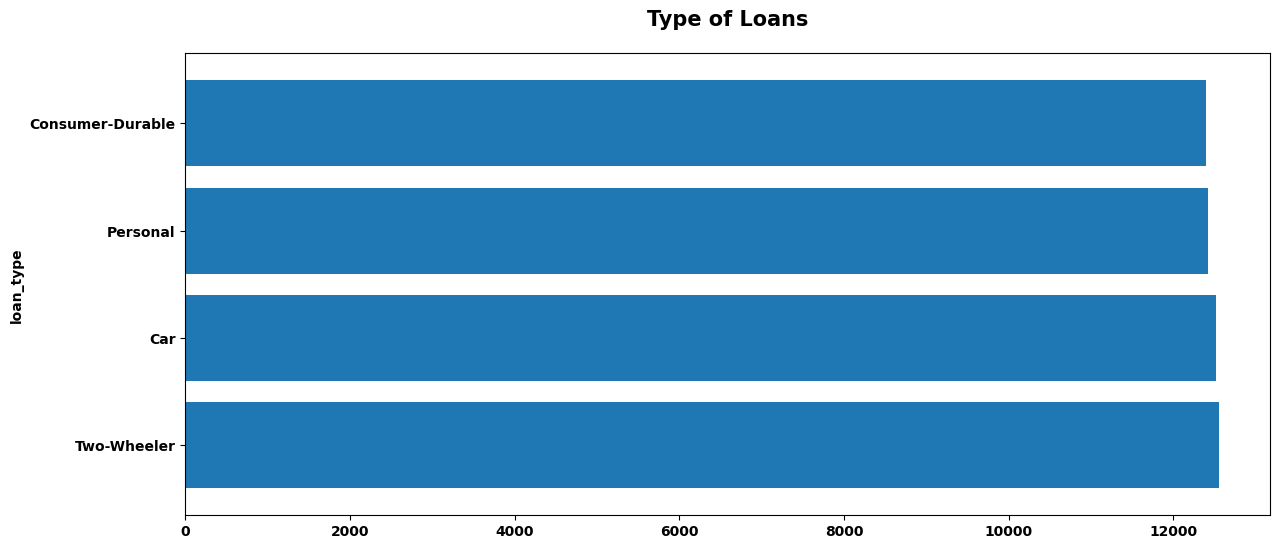

In [52]:
#Univariate Analysis
plt.figure(figsize = [14,6])
data["loan_type"].value_counts().plot.barh(width = .8)
plt.title("Type of Loans", fontdict={"fontsize":15}, pad =20)
plt.show()

In [53]:
def Uni_Analysis_Numarical(dataframe, column):
    sns.set(style='darkgrid')
    plt.figure(figsize=(25, 5))

    plt.subplot(1, 3, 1)
    sns.boxplot(data=dataframe, x=column, orient='v').set(title='Box Plot')

    plt.subplot(1, 3, 2)
    sns.distplot(dataframe[column].dropna()).set(title='Distplot')
    plt.show()

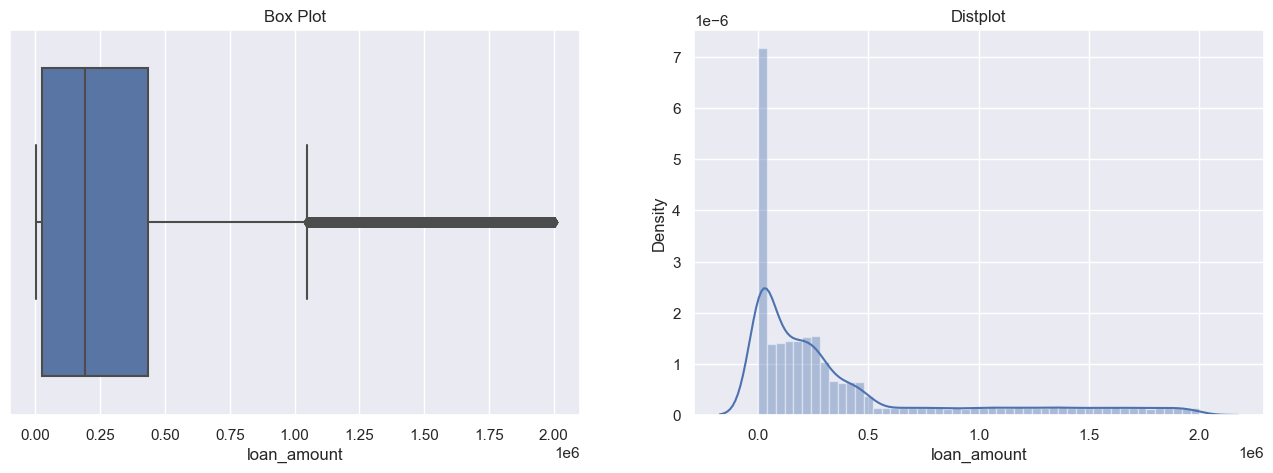

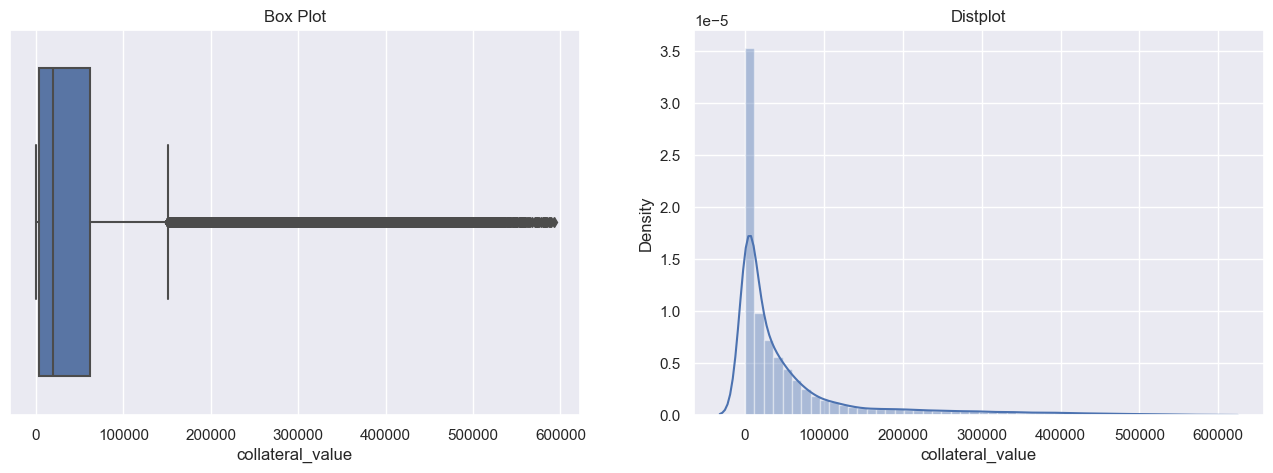

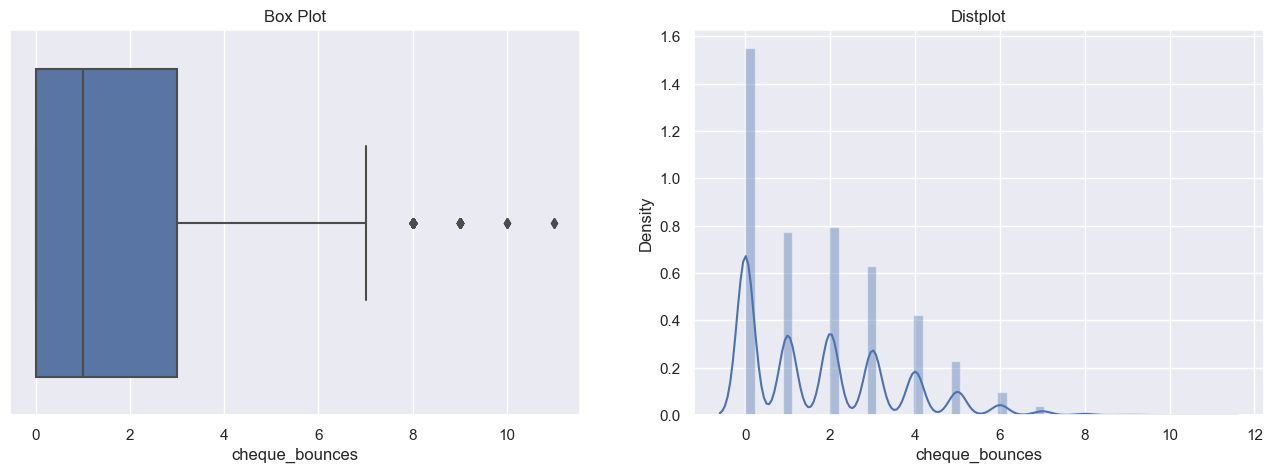

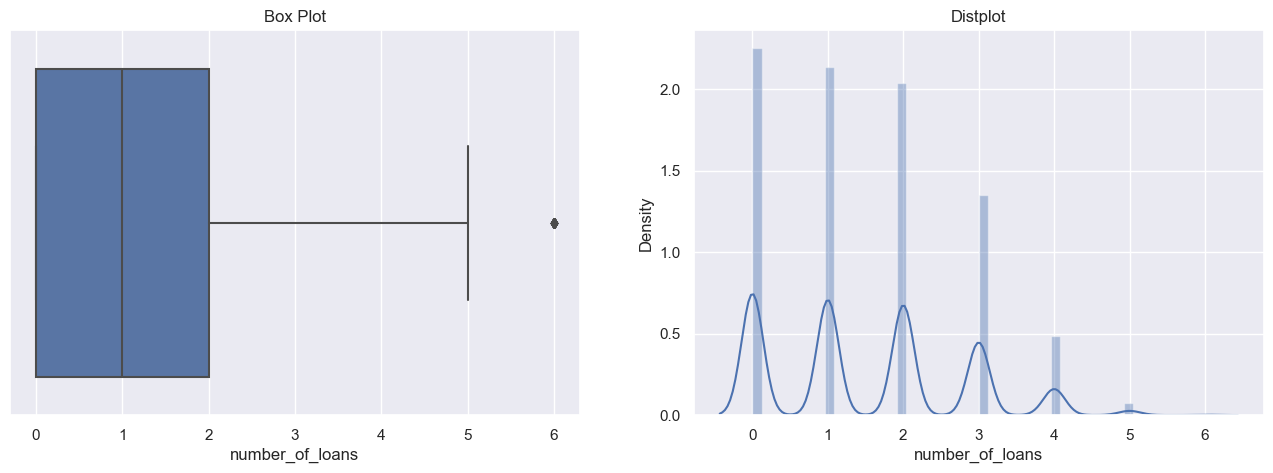

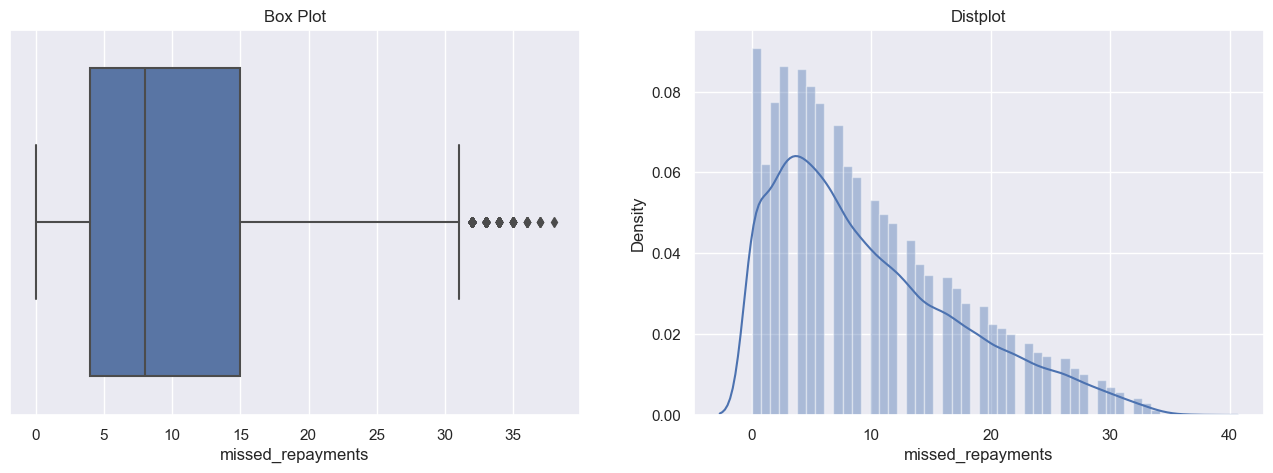

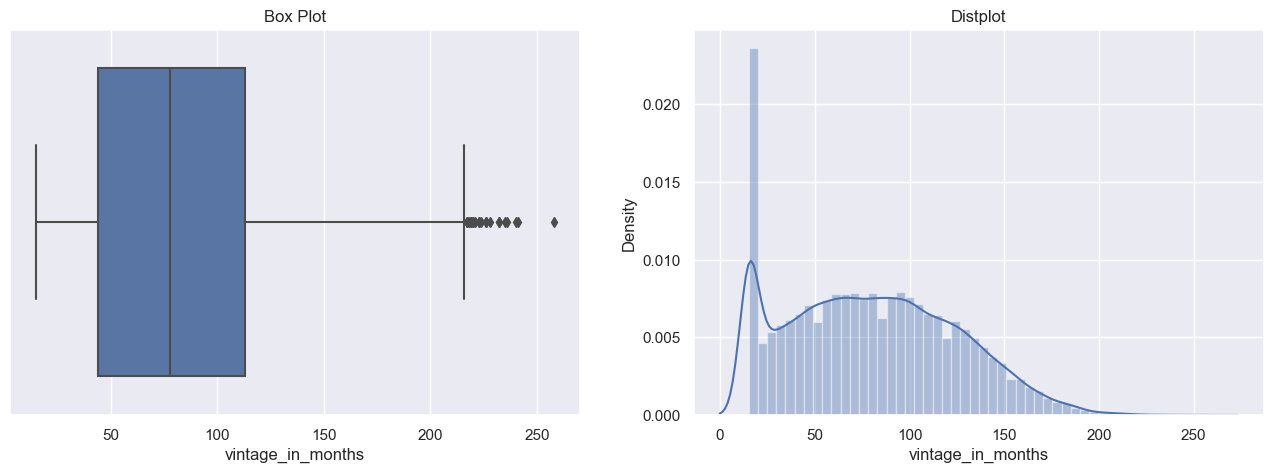

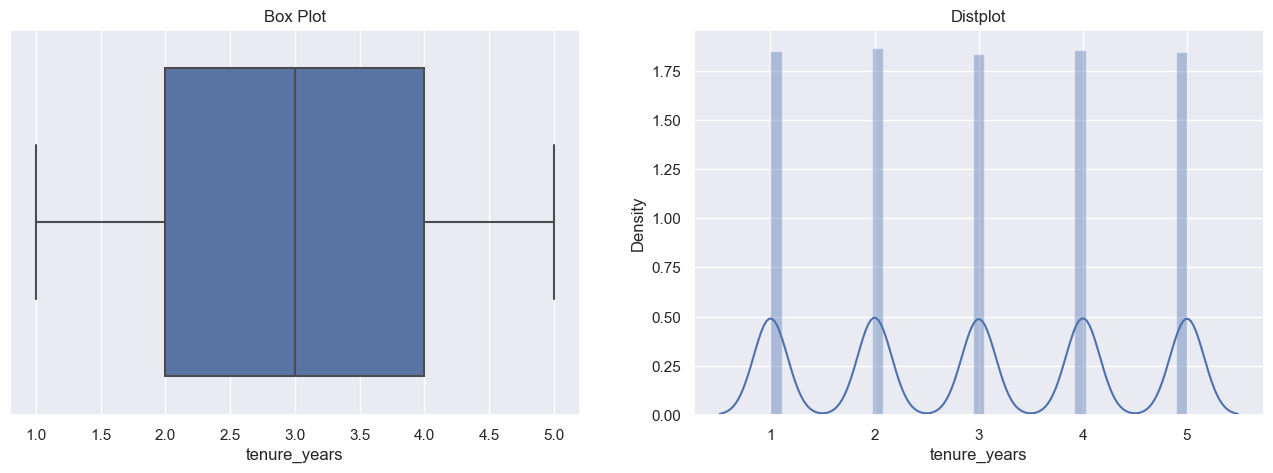

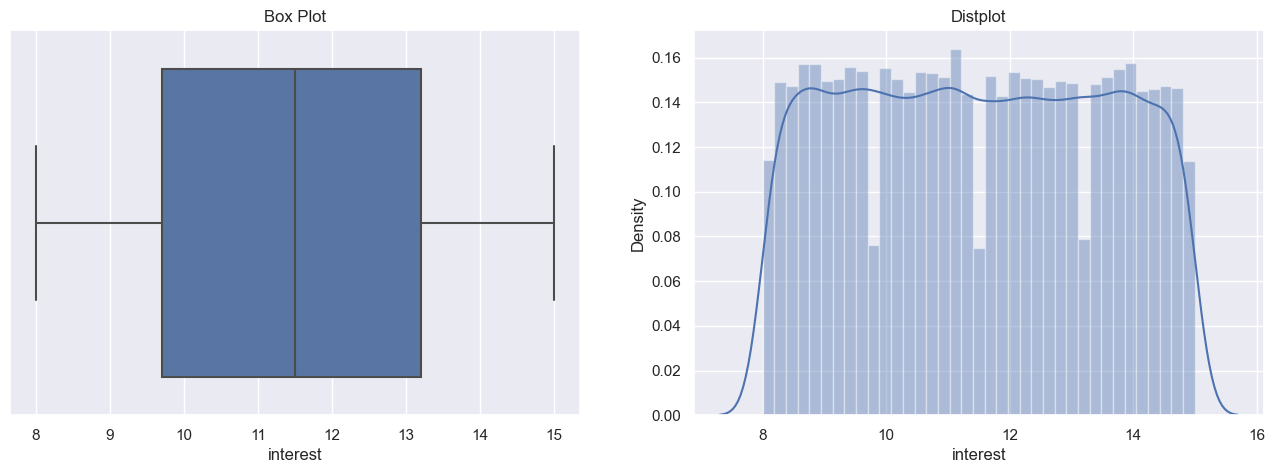

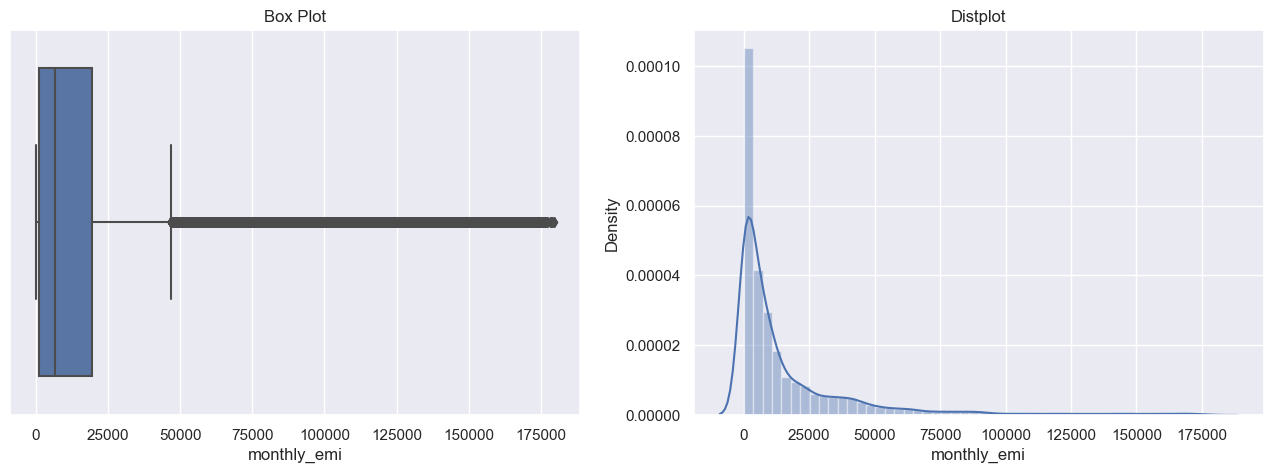

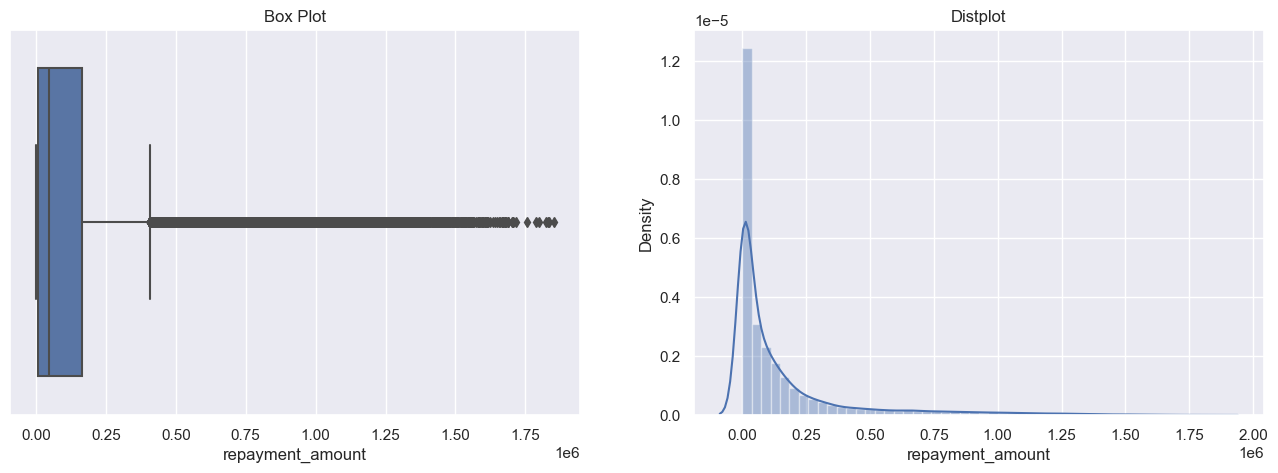

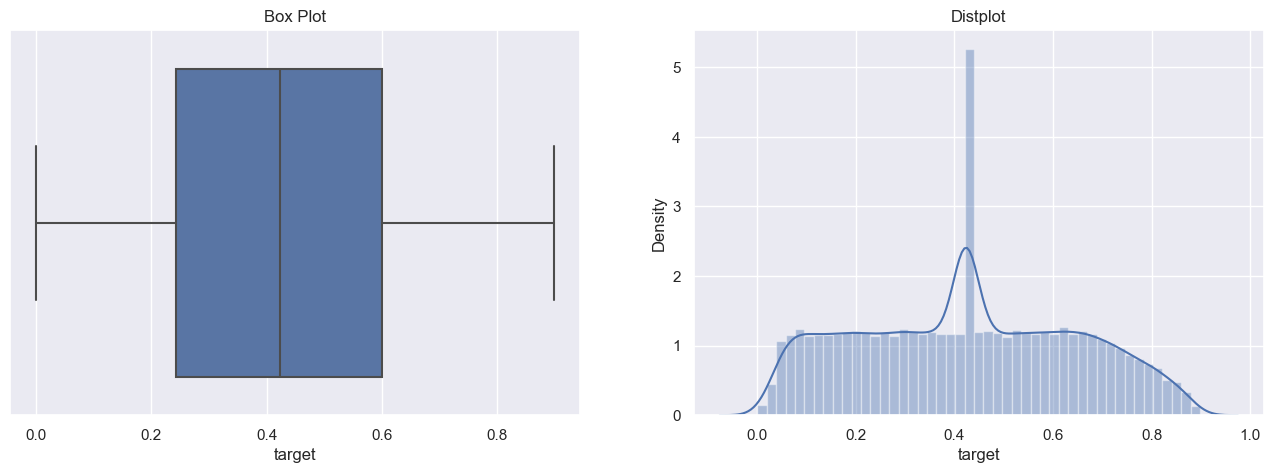

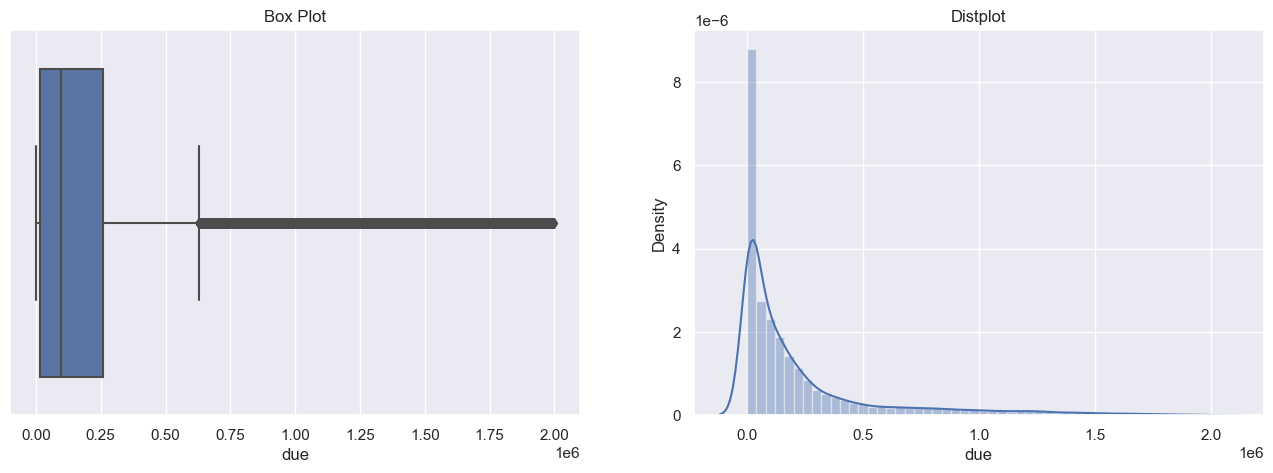

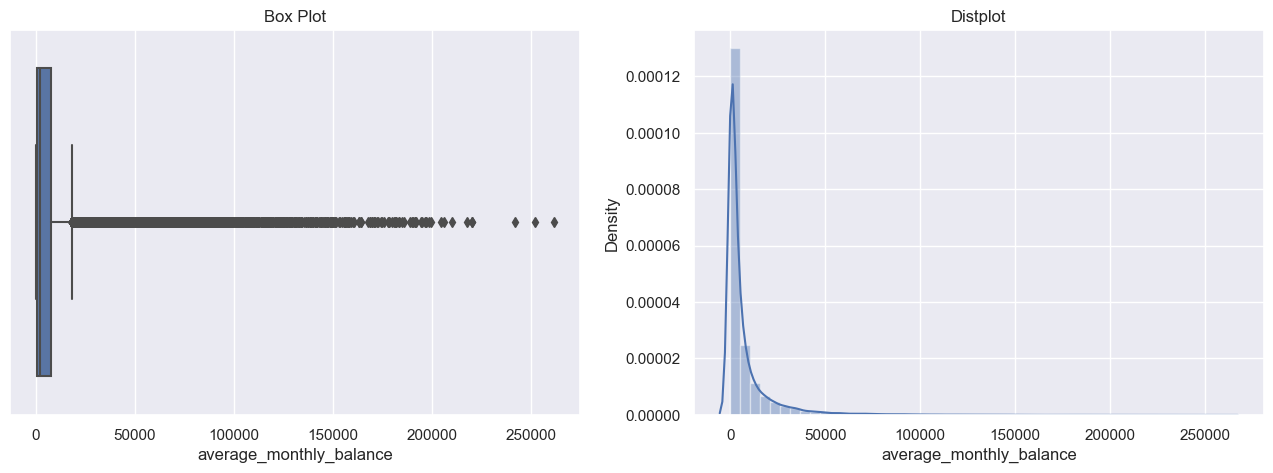

In [54]:
#Distribution of the numerical features
for i in numeric_data:
    Uni_Analysis_Numarical(data,i)

<Axes: xlabel='loan_amount', ylabel='repayment_amount'>

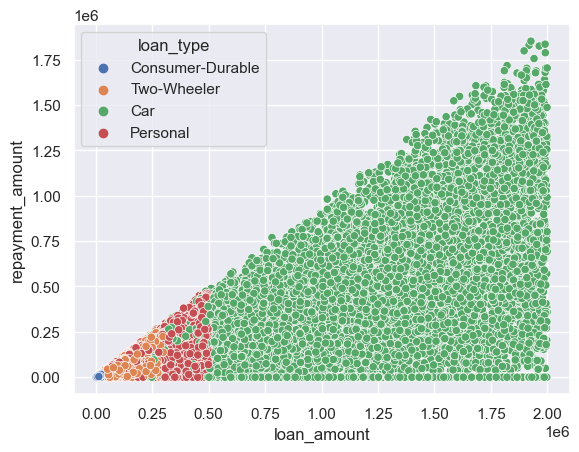

In [55]:
sns.scatterplot(x=data.loan_amount,
                y = data.repayment_amount,
                data=data,hue = 'loan_type')

Observation: Though the number of Two-Wheeler loan is greater than others, Car loan comprised the maximum loan amount

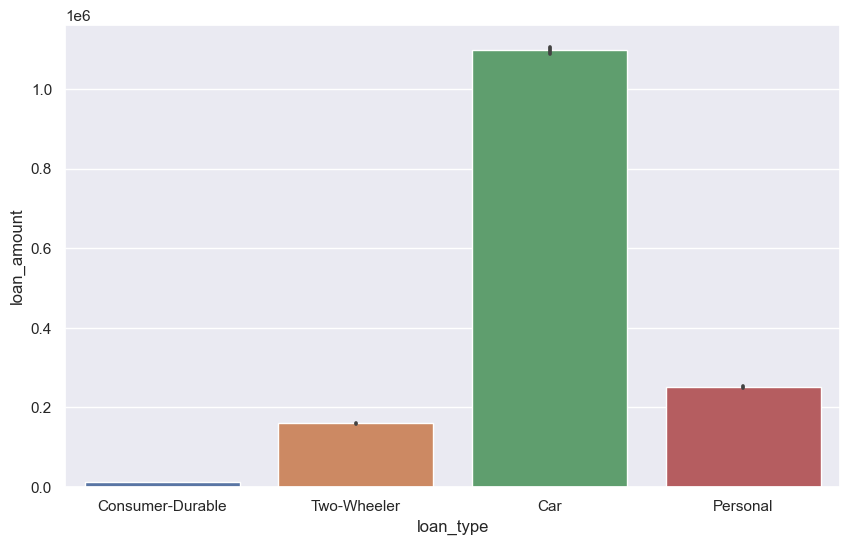

In [56]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.loan_amount)
plt.show()

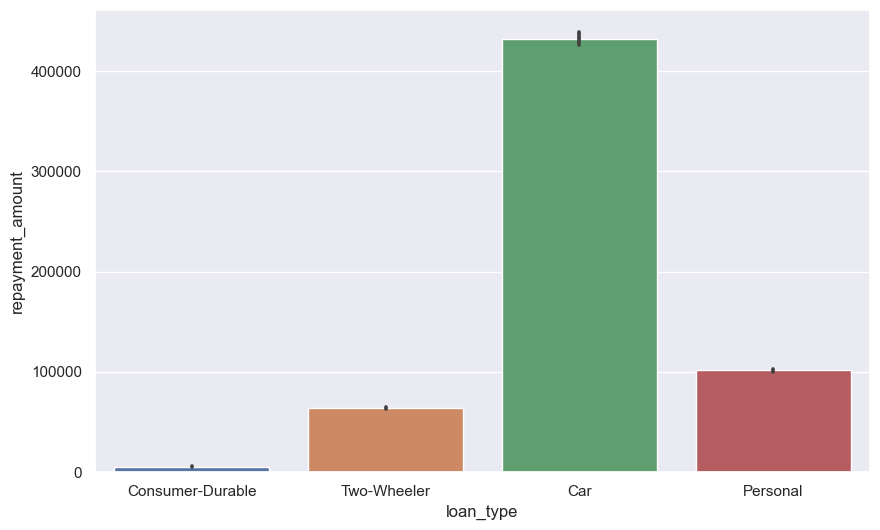

In [57]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.repayment_amount)
plt.show()

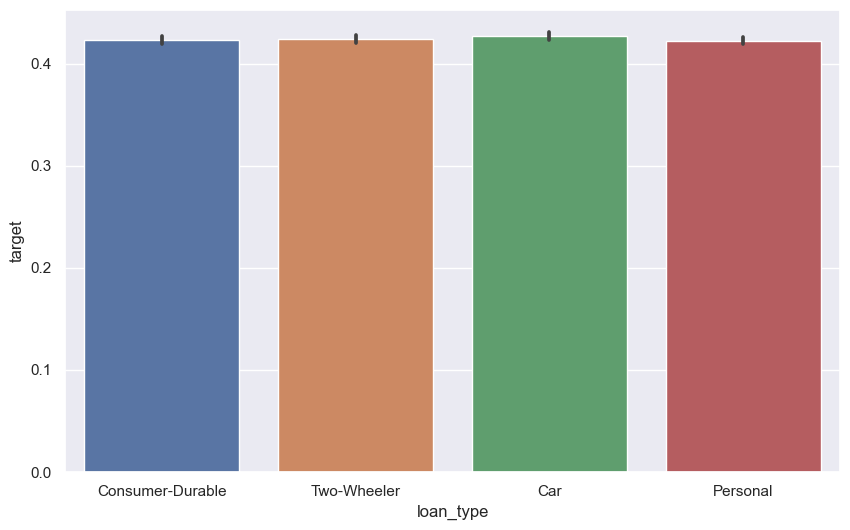

In [58]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.target)
plt.show()

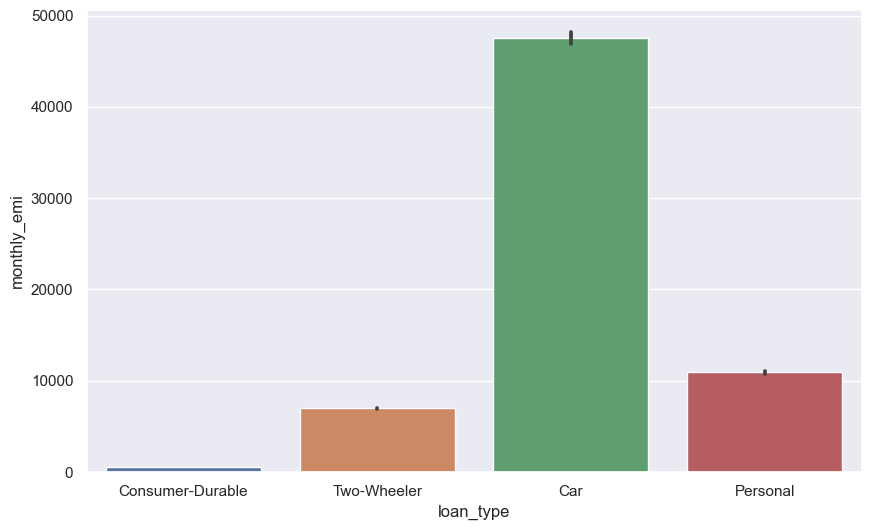

In [59]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.monthly_emi)
plt.show()

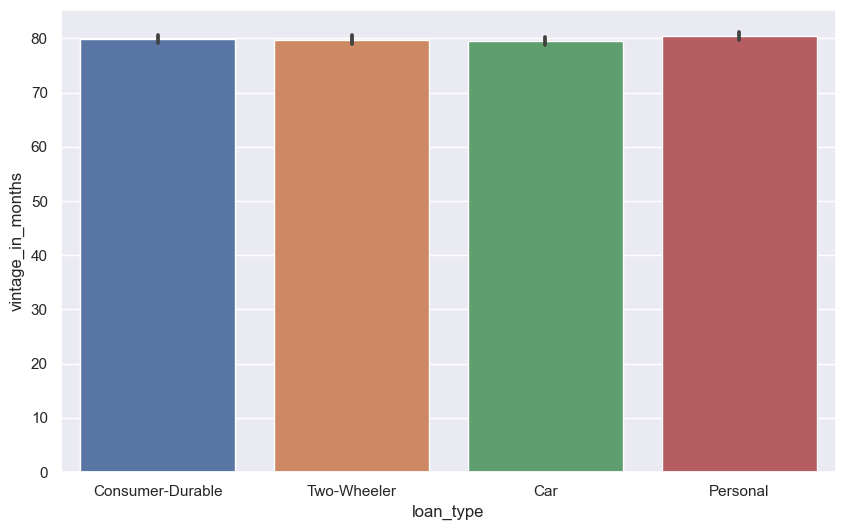

In [60]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.vintage_in_months)
plt.show()

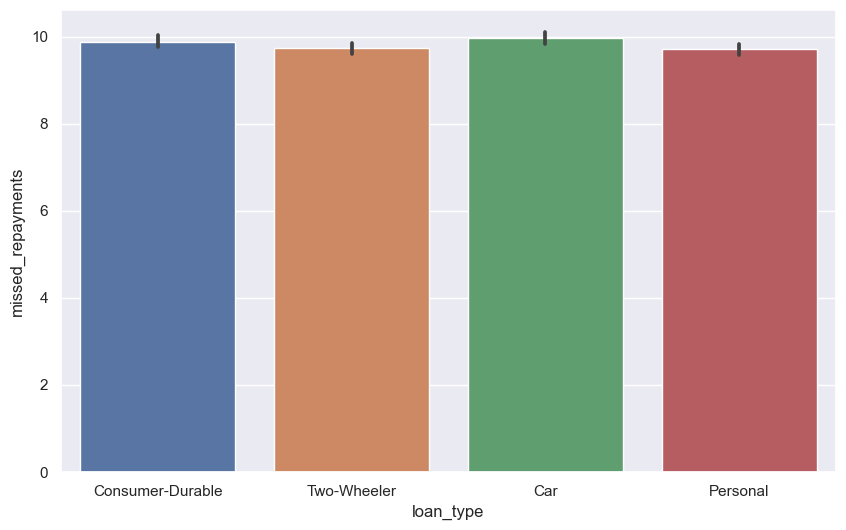

In [61]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.missed_repayments)
plt.show()

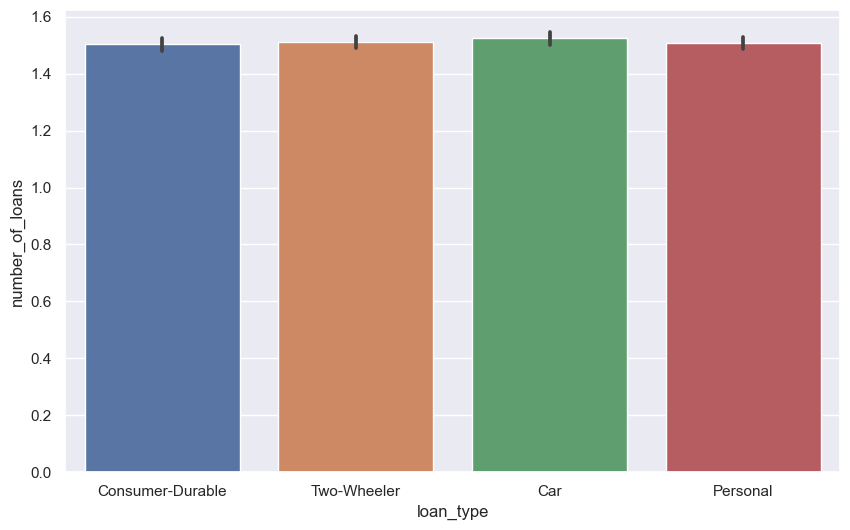

In [62]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.number_of_loans)
plt.show()

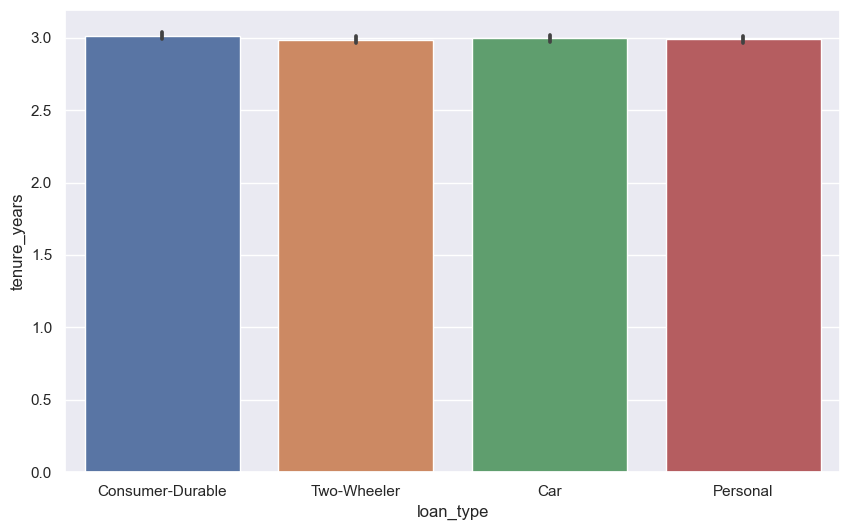

In [63]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.tenure_years)
plt.show()

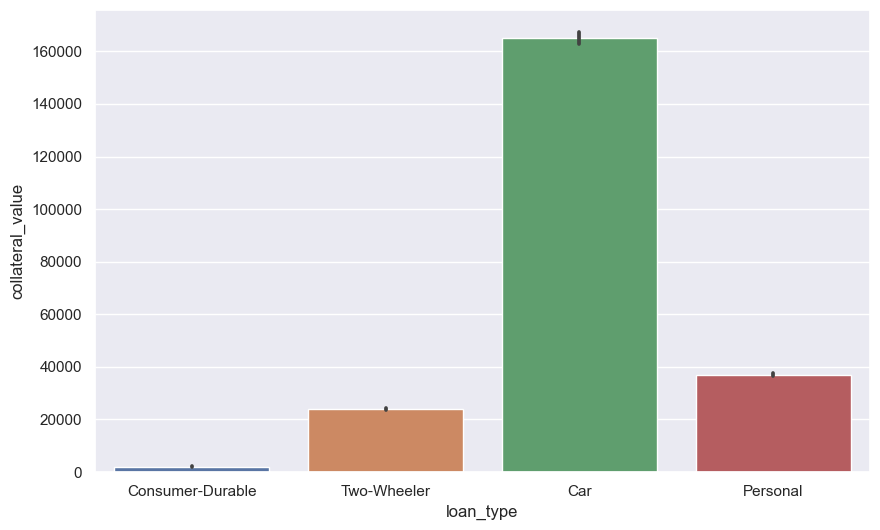

In [64]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.collateral_value)
plt.show()

Observation: Repayment Amount or EMI amount of Car loan are way higher than other loan types

**Data Preparation: variable transformation, feature engineering**

In [65]:
#separating numeric and categorical features
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

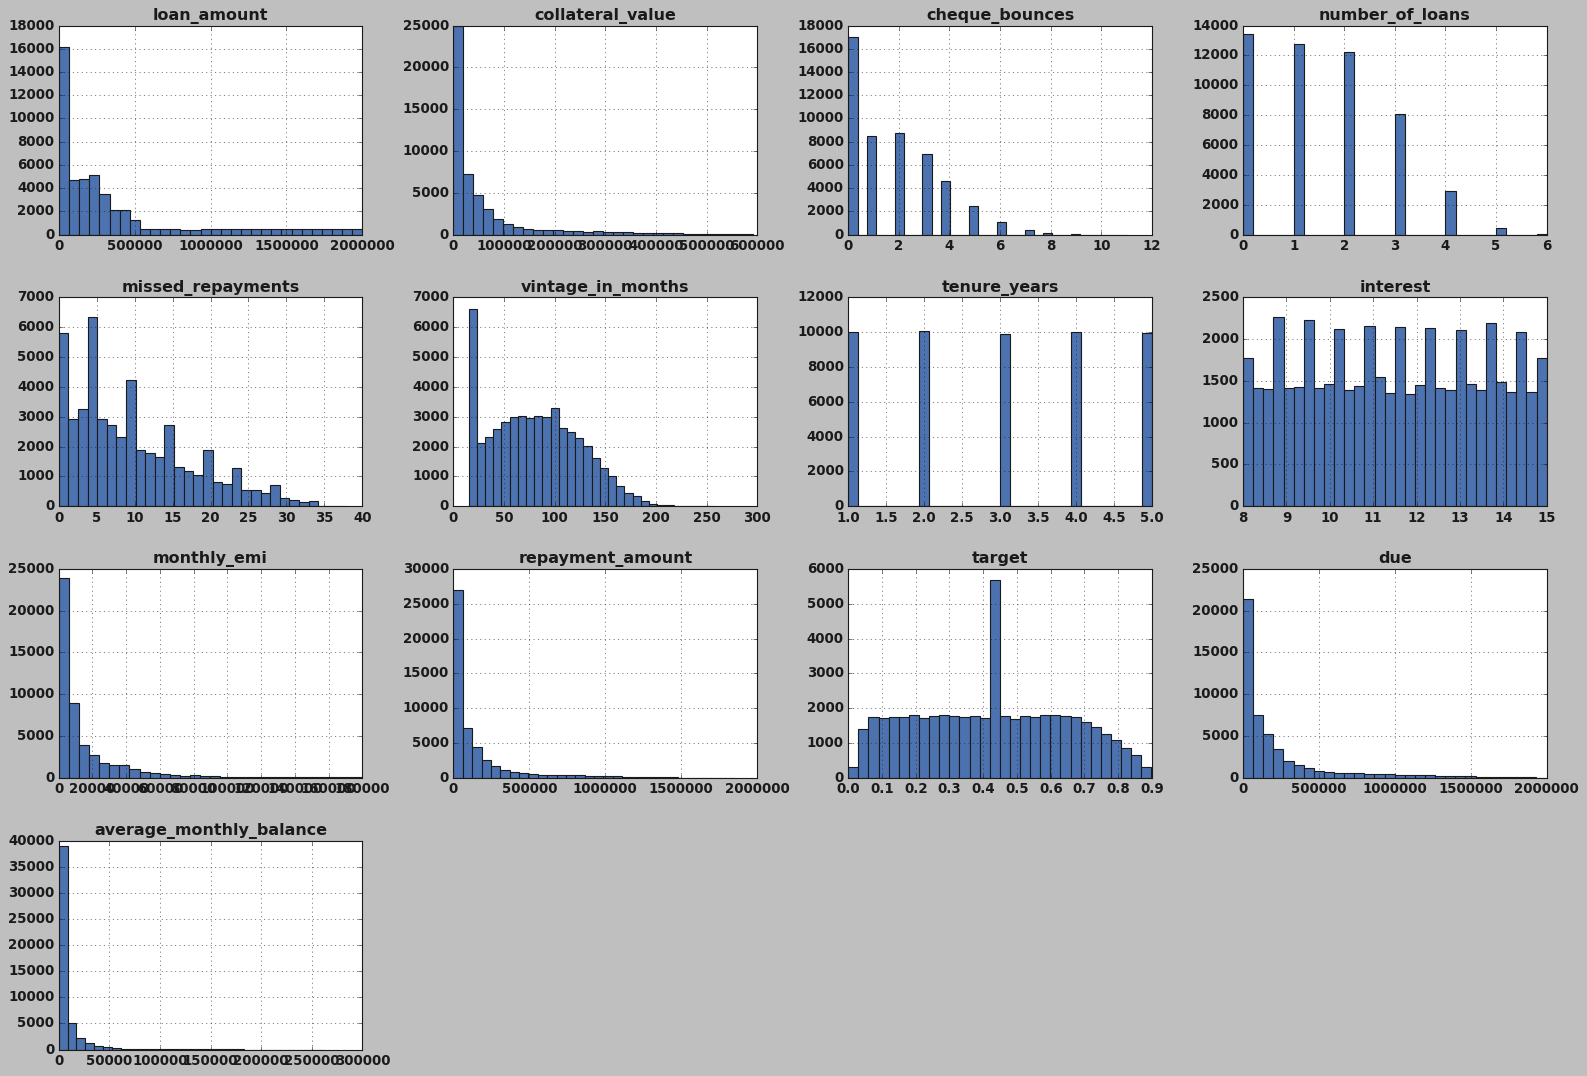

In [66]:
#plt.figure(figsize = (24,24))
plt.style.use('classic')
data[numeric_data.columns].hist(bins=30, figsize = (24,16))
plt.show()

In [67]:
#Checking the numeric columns
numeric_data.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'target', 'due',
       'average_monthly_balance'],
      dtype='object')

<Axes: >

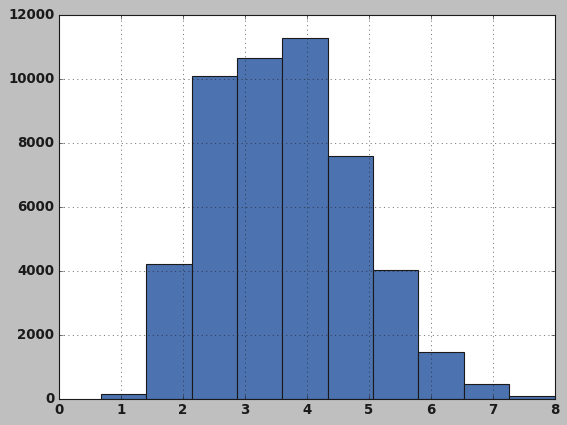

In [68]:
#Plotting histogram of the same.
(data['average_monthly_balance']**(1/6)).hist()

<Axes: >

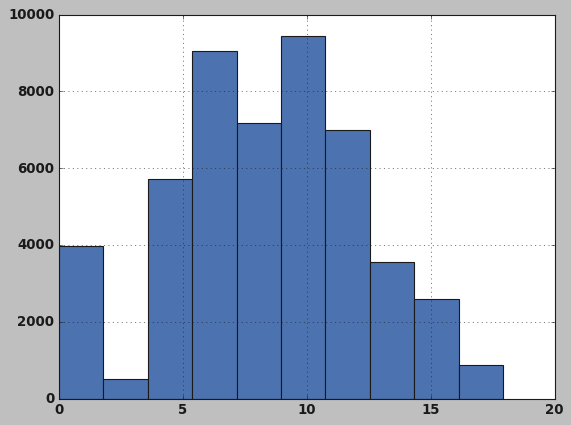

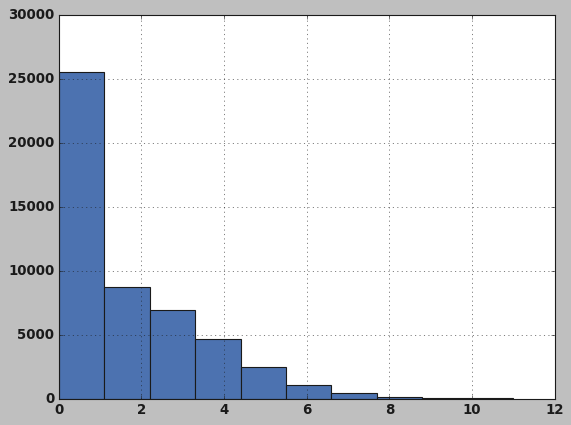

In [69]:
(data['repayment_amount']**(1/5)).hist()
fig = plt.figure()
(data['cheque_bounces']).hist()

I used Power Transformation here with respect to the linear regression assumption that all the independent features should have normal distribution

In [70]:
data['loan_amount'] = data['loan_amount']**(1/5)
data['collateral_value'] = data['collateral_value']**(1/5)
data['cheque_bounces'] = data['cheque_bounces']**(1/2)
data['missed_repayments'] = data['missed_repayments']**(1/2)
data['vintage_in_months'] = data['vintage_in_months']**(1/2)
data['monthly_emi'] = data['monthly_emi']**(1/6)
data['repayment_amount'] = data['repayment_amount']**(1/5)
data['average_monthly_balance'] = data['average_monthly_balance']**(1/6)

In [71]:
test_data['collateral_value'] = test_data['collateral_value']**(1/5)
test_data['cheque_bounces'] = test_data['cheque_bounces']**(1/2)
test_data['missed_repayments'] = test_data['missed_repayments']**(1/2)
test_data['vintage_in_months'] = test_data['vintage_in_months']**(1/2)
test_data['monthly_emi'] = test_data['monthly_emi']**(1/6)
test_data['repayment_amount'] = test_data['repayment_amount']**(1/5)
test_data['average_monthly_balance'] = test_data['average_monthly_balance']**(1/8)

In [72]:
#Grouping the categorical column.
categorical_data.columns

Index(['loan_acc_num', 'customer_name', 'customer_address', 'loan_type',
       'disbursal_date', 'default_date'],
      dtype='object')

In [73]:
curr_time = pd.to_datetime("now")

In [74]:
#deriving new feature using date column
data['difference'] = (curr_time-data['default_date'])/np.timedelta64(1,'D')

In [75]:
test_data['default_date'] = pd.to_datetime(test_data['default_date'], infer_datetime_format=True)

In [76]:
#deriving new feature using date column
test_data['difference'] = (curr_time-test_data['default_date'])/np.timedelta64(1,'D')

In [77]:
#dropping unnecessary columns for model building
data = data.drop(['disbursal_date', 'default_date','loan_acc_num', 'customer_name', 'customer_address'],axis=1)

In [78]:
#dropping unnecessary columns for model building
test_data = test_data.drop(['disbursal_date', 'default_date','loan_acc_num', 'customer_name', 'customer_address'],axis=1)

In [79]:
#encoding
encoded = pd.get_dummies(data['loan_type'],drop_first=True)

In [80]:
#encoding
test_encoded = pd.get_dummies(test_data['loan_type'],drop_first=True)

In [81]:
data = data.drop(['loan_type'],axis=1)

In [82]:
test_data = test_data.drop(['loan_type'],axis=1)

In [83]:
data = pd.concat([data,encoded],axis=1)

In [84]:
test_data = pd.concat([test_data,test_encoded],axis=1)

<Axes: >

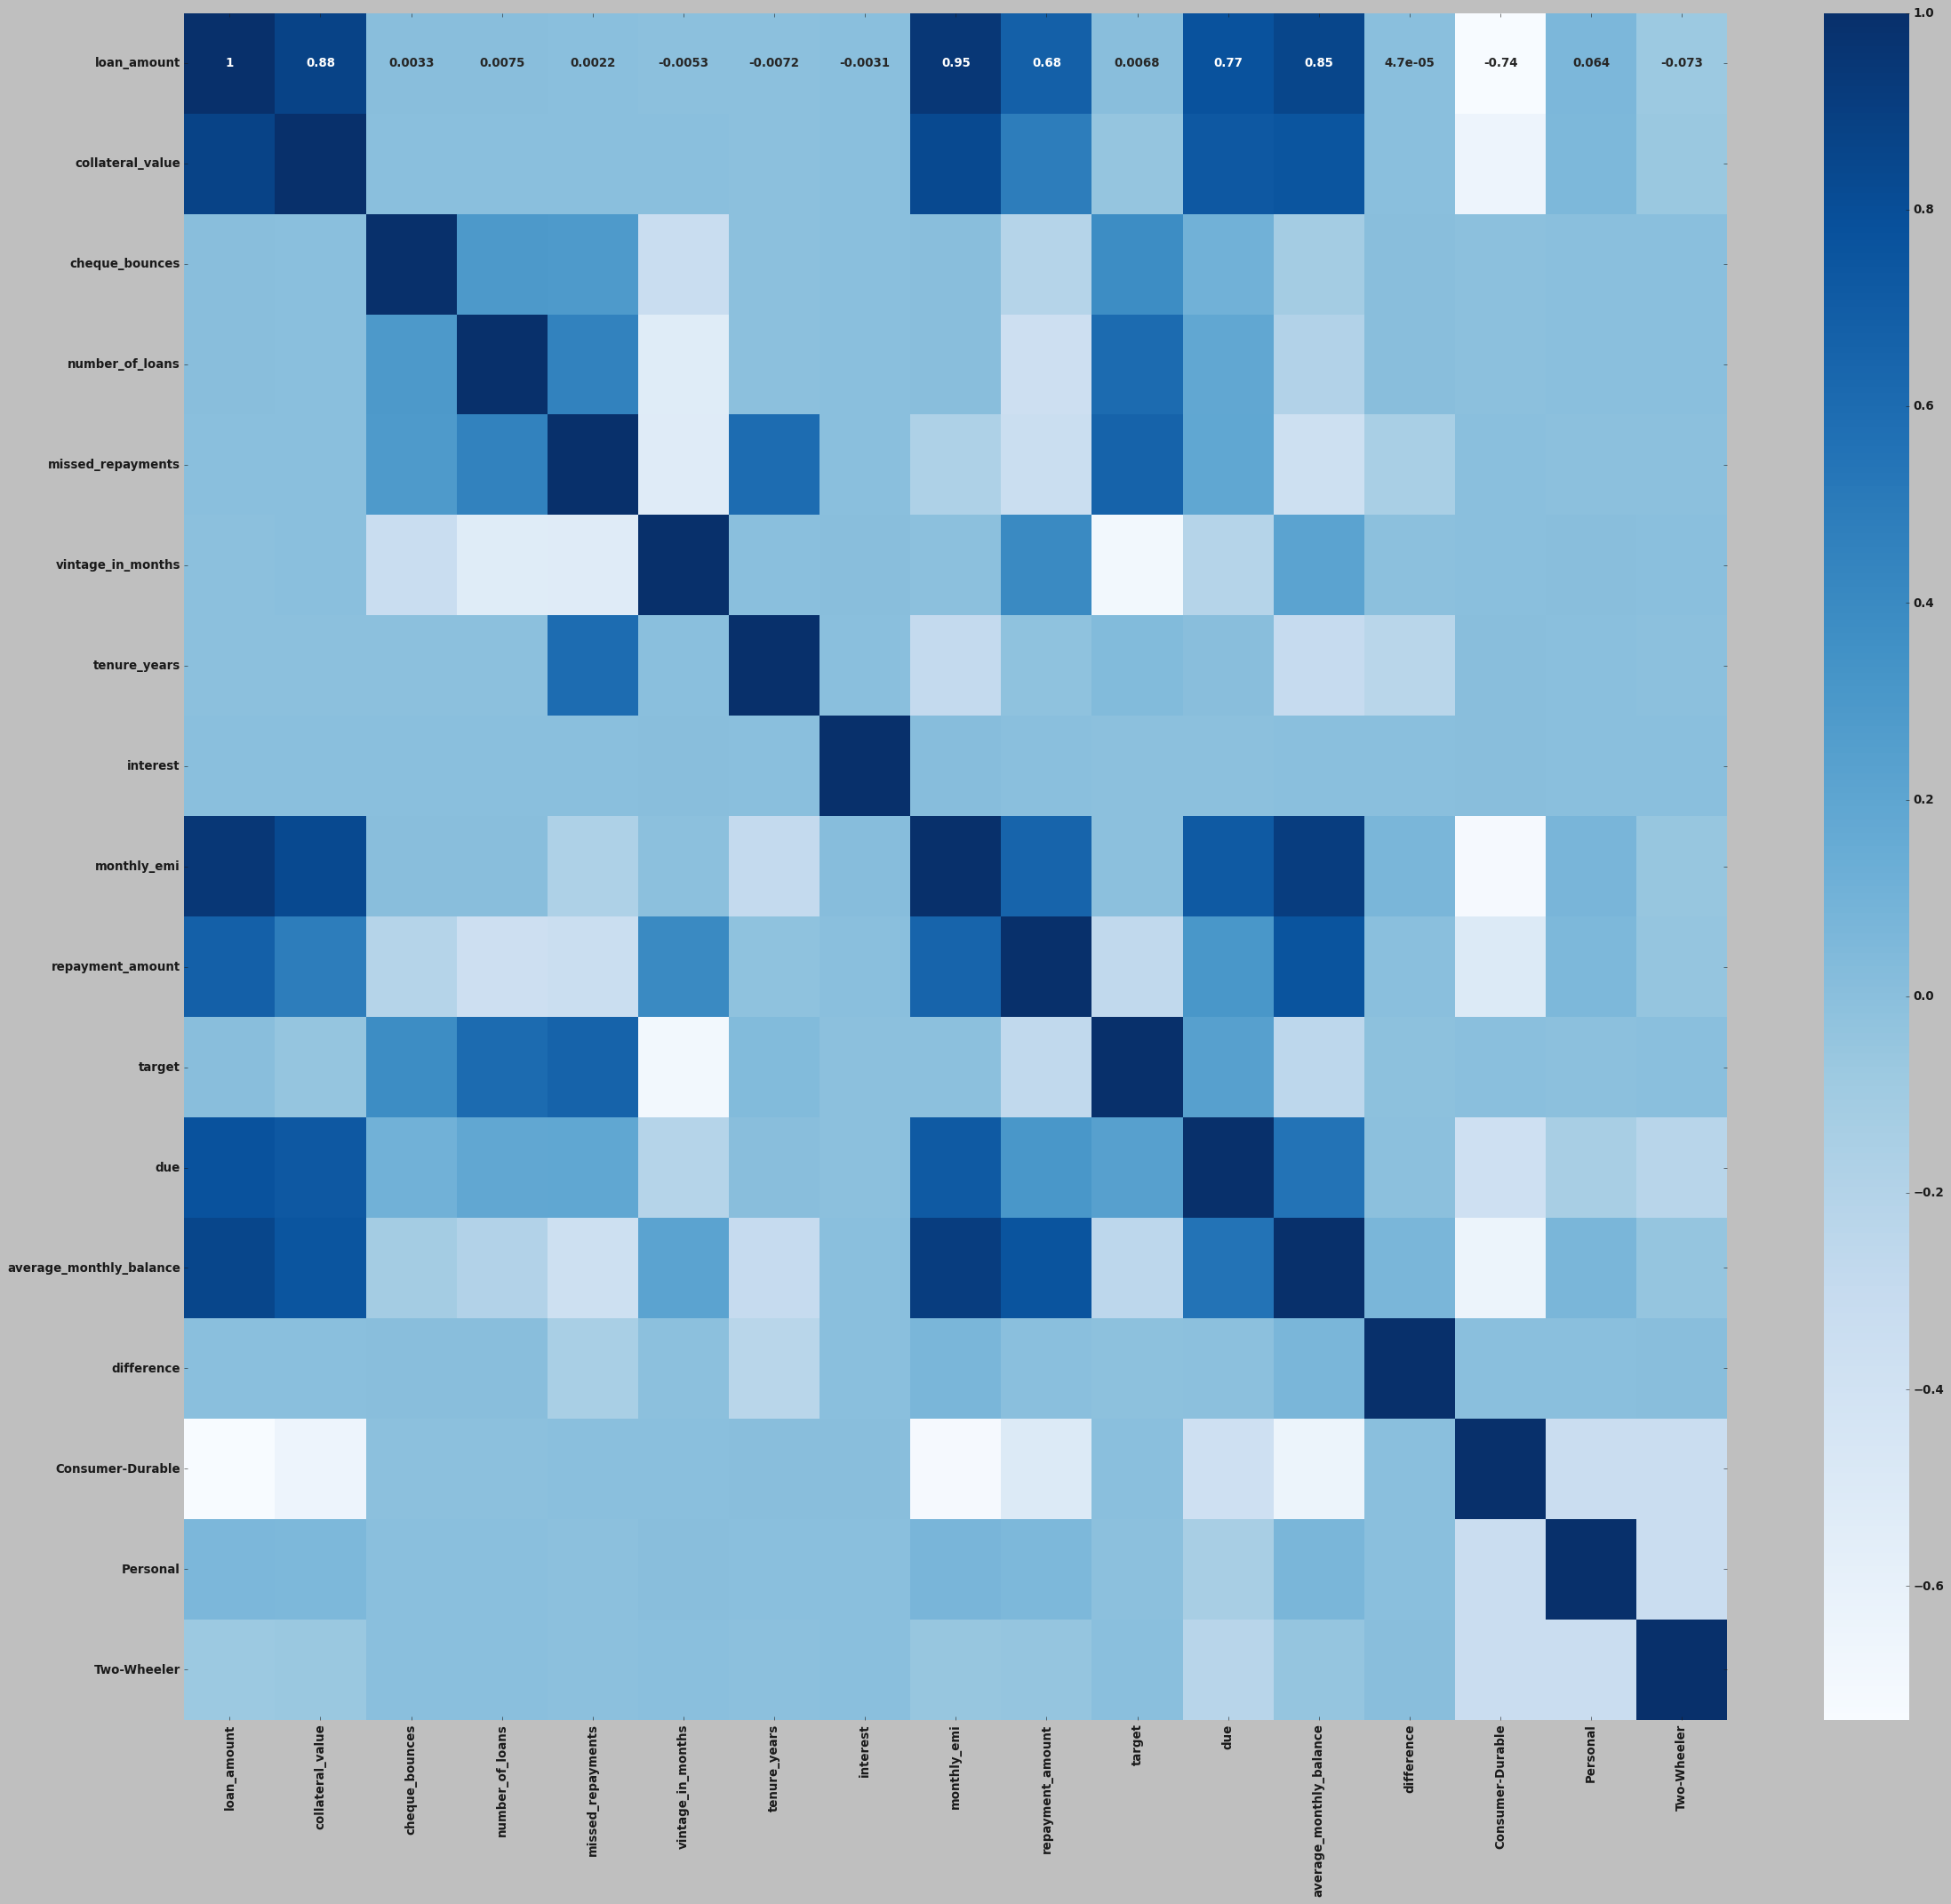

In [85]:
#Correlation Plot: Heatmap
import seaborn as sns
plt.figure(figsize = (35,30))

corr = data.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

**MACHINE LEARNING MODELLING**

In [86]:
#train-test split
from sklearn.model_selection import train_test_split
X = data.drop(columns=['target'])
y = data [['target']]
# Choose any random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [87]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [88]:
unseen = sc.fit_transform(test_data)

In [89]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

**Using Recusrive Feature Elimination**

In [90]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [91]:
from sklearn.linear_model import *
from  sklearn import metrics
#Rsquared on test set
y_pred_lr = rfe.predict(X_test)
metrics.r2_score(y_test, y_pred_lr)

0.7756349800595059

**Using Multiple Linear Regression**

In [92]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

lm.fit(X_train, y_train)
#Rsquared on test set
y_pred_lr = lm.predict(X_test)
metrics.r2_score(y_test, y_pred_lr)

0.7811962854570617

**Using Random Forest Regressor**

In [93]:
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(bootstrap= True,n_estimators = 200, random_state = 42, max_depth=4,max_features=None,min_samples_leaf= 2,min_samples_split= 4)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features=None, min_samples_leaf=2,
                      min_samples_split=4, n_estimators=200, random_state=42)

In [94]:
y_pred_train = rf_regressor.predict(X_train)
print(r2_score(y_train, y_pred_train))

0.7245706459113583


In [95]:
y_pred_test = rf_regressor.predict(X_test)
print(r2_score(y_test, y_pred_test))

0.7273636647483162


**Further Experiments**

Using XGBoost Regressor

In [96]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [97]:
# define model
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('R_squared: %.3f (%.3f)' % (scores.mean(), scores.std()) )

R_squared: 0.977 (0.001)


In [98]:
# evaluate model
scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('R_squared: %.3f (%.3f)' % (scores.mean(), scores.std()) )

R_squared: 0.970 (0.002)


In [99]:
from xgboost import XGBRegressor
# define model
RegModel=XGBRegressor(max_depth=4, learning_rate=0.01, n_estimators=500, objective='reg:linear', booster='gbtree')

In [100]:
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=XGB.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

train score:  0.8997984846286473
test score:  0.896429166271675


**Using Adaboost Regressor**

In [101]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(n_estimators=500,learning_rate=0.1)
Adaboost=ada_reg.fit(X_train,y_train)
prediction=Adaboost.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=Adaboost.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

train score:  0.763440604307455
test score:  0.7680874339338815


**Using LightGBM**

In [102]:
plt.style.use('ggplot')
import lightgbm as ltb

In [103]:
model = ltb.LGBMRegressor()
model.fit(X_train, y_train)
print(); print(model)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2134
[LightGBM] [Info] Number of data points in the train set: 34922, number of used features: 16
[LightGBM] [Info] Start training from score 0.424165

LGBMRegressor()


In [104]:
y_pred = model.predict(X_test)
print("Rsqaured on test data: ",metrics.r2_score(y_test, y_pred))

Rsqaured on test data:  0.965125001305115


**Model Evaluation: Hyperparameter Tuning**

In [105]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
params = { 'max_depth': [3,4,5],
           'learning_rate': [0.01, 0.05, 0.1,0.25,0.5,0.015,1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = xgb.XGBRegressor(seed = 20)

clf = GridSearchCV(estimator=xgbr,
                   param_grid=params,
                   scoring='r2',
                   verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.25, 'max_depth': 4, 'n_estimators': 1000}


In [106]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
# define the model with best resulted parameters
RegModel=XGBRegressor(colsample_bytree= 0.7, max_depth=3, learning_rate=0.5, n_estimators=1000, objective='reg:linear', booster='gbtree')
xgbr = xgb.XGBRegressor(seed = 20)
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=XGB.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

train score:  0.9959192885034708
test score:  0.9897083070417368


In [107]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
# define the model with best resulted parameters
RegModel=XGBRegressor(colsample_bytree= 0.7, max_depth=3, learning_rate=0.5, n_estimators=1000, objective='reg:linear', booster='gbtree')
xgbr = xgb.XGBRegressor(seed = 20)
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=XGB.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

train score:  0.9959192885034708
test score:  0.9897083070417368


**Prediction on Unseen Data**

In [108]:
data.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'target', 'due',
       'average_monthly_balance', 'difference', 'Consumer-Durable', 'Personal',
       'Two-Wheeler'],
      dtype='object')

In [109]:
test_data.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'target', 'due',
       'average_monthly_balance', 'difference', 'Consumer-Durable', 'Personal',
       'Two-Wheeler'],
      dtype='object')

In [110]:
test_data = sc.fit_transform(test_data)

In [111]:
test_data = pd.DataFrame(test_data)

In [112]:
test_data.columns

RangeIndex(start=0, stop=17, step=1)

In [113]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.750745,-0.367000,0.839995,-0.396076,-0.421033,0.607027,-1.404938,0.291703,2.130628,1.566969,0.153229,1.039371,1.516423,1.013965,-0.570843,-0.575772,-0.586245
1,-0.720925,-0.968633,-1.227922,1.190926,1.690935,-0.883665,1.423612,0.341404,-1.230037,-0.958324,1.677229,-0.615037,-1.436140,0.409814,1.751794,-0.575772,-0.586245
2,-0.349517,-0.460543,-0.034010,0.397425,-2.070557,-0.237481,-1.404938,1.186321,0.674578,0.447451,0.001348,-0.391021,1.143536,1.613680,-0.570843,-0.575772,-0.586245
3,-0.377747,0.125864,1.159903,1.190926,0.484874,-1.789412,-0.697801,0.490507,0.207495,-0.337410,1.572648,-0.158069,0.113519,-1.488692,-0.570843,-0.575772,1.705772
4,-0.752389,-1.084208,-0.034010,-0.396076,-2.070557,1.439430,-1.404938,1.534228,-1.190368,-0.849910,-1.217774,-0.664847,-0.593545,-0.749694,1.751794,-0.575772,-0.586245


In [115]:
test_data.columns = ['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'target', 'due',
       'average_monthly_balance', 'difference', 'Consumer-Durable', 'Personal',
       'Two-Wheeler']

In [116]:
test_data = test_data.drop(['target'], axis=1)

In [117]:
#Making predictions
final_predictions = XGB.predict(test_data)
final_prediction_series = pd.Series(final_predictions)

In [118]:
#Combining the results into dataframe
submission_df = pd.DataFrame({'id':test_df['loan_acc_num'].values, 'LGD':final_prediction_series.values})

In [119]:
submission_df.sample(10)

,id,LGD
317,LN36828570,0.522102
7284,LN99487972,0.829947
6992,LN10300952,0.178929
8521,LN80550261,0.574502
1475,LN83351430,0.838399
2458,LN77341762,0.016068
3329,LN19263110,0.659760
4269,LN54534258,0.370972
7787,LN97846412,0.604150
254,LN13952263,0.027874
